--- Generating a map for each climate variable for January 1995 ---

Processing: 2m Temperature


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


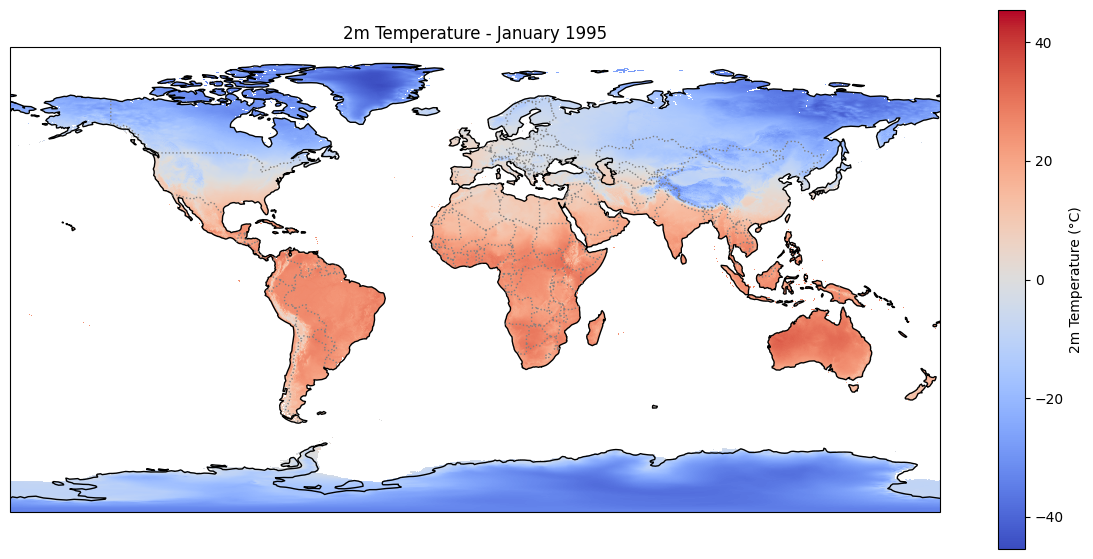


Processing: Total Precipitation


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


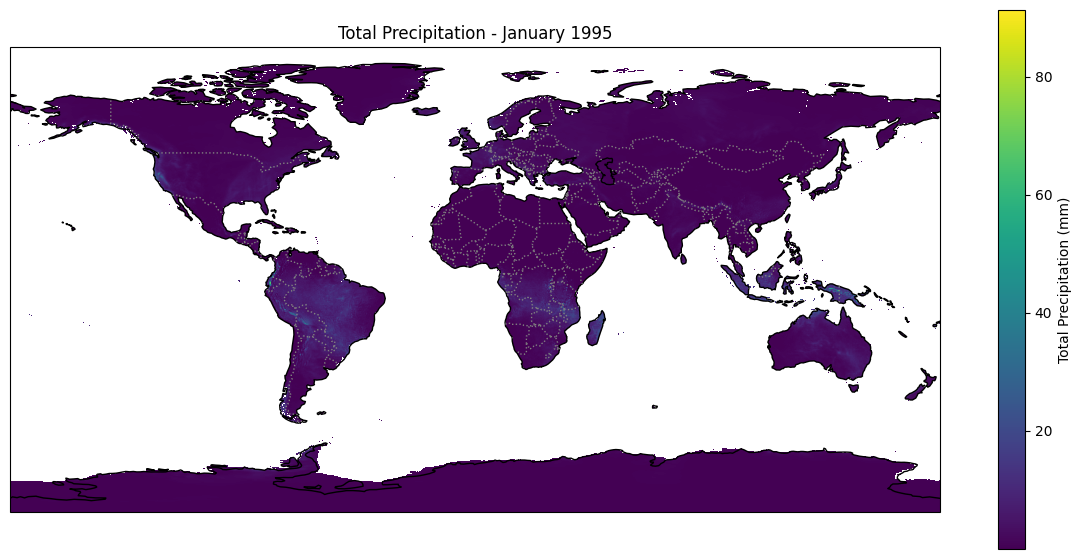


Processing: Volumetric Soil Water (Layer 1)


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


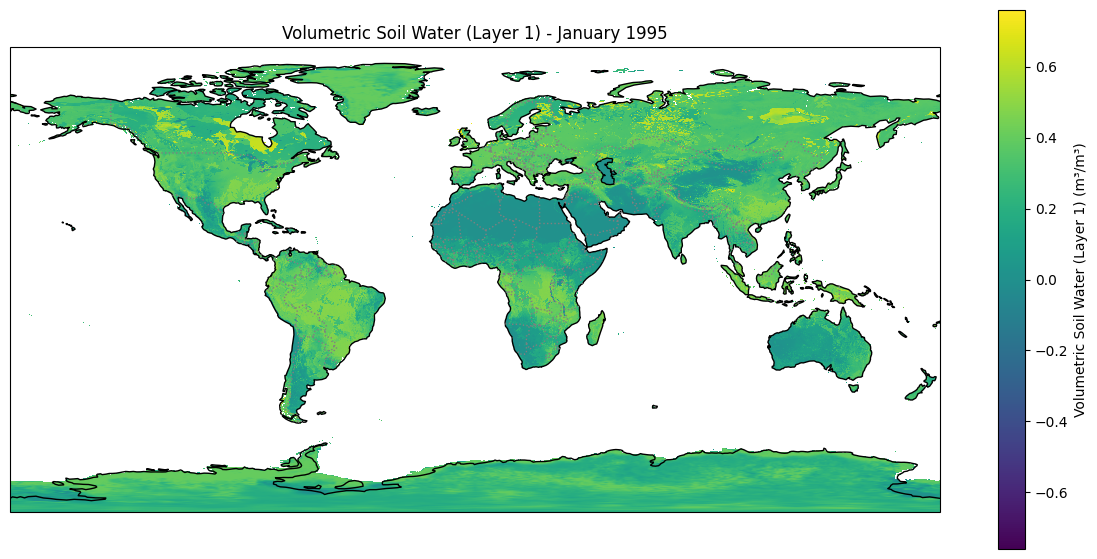


Processing: Surface Net Solar Radiation


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


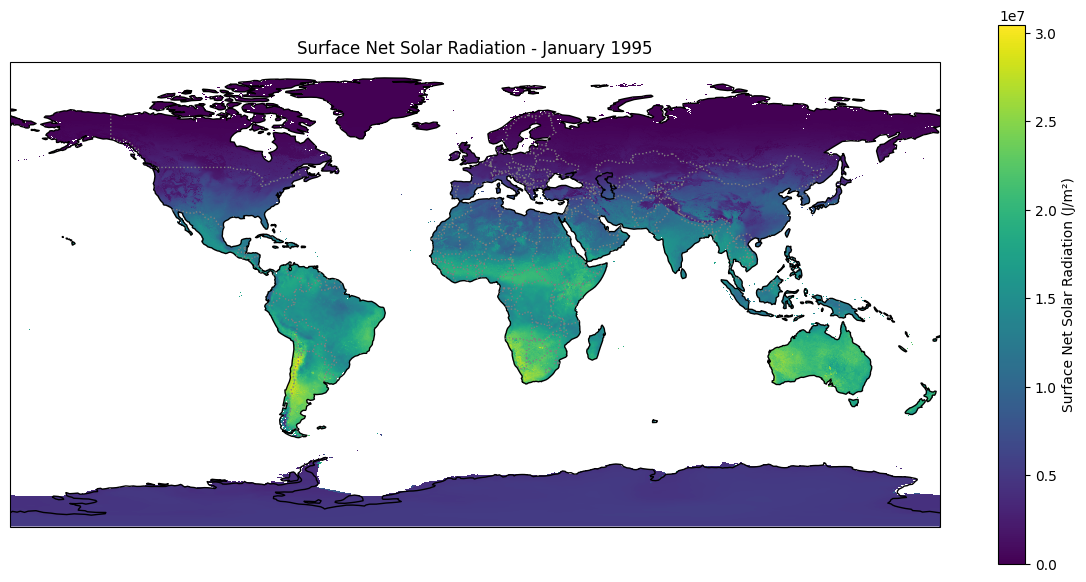


Processing: Potential Evaporation


C:\ProgramData\miniconda3\envs\climarisc\lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


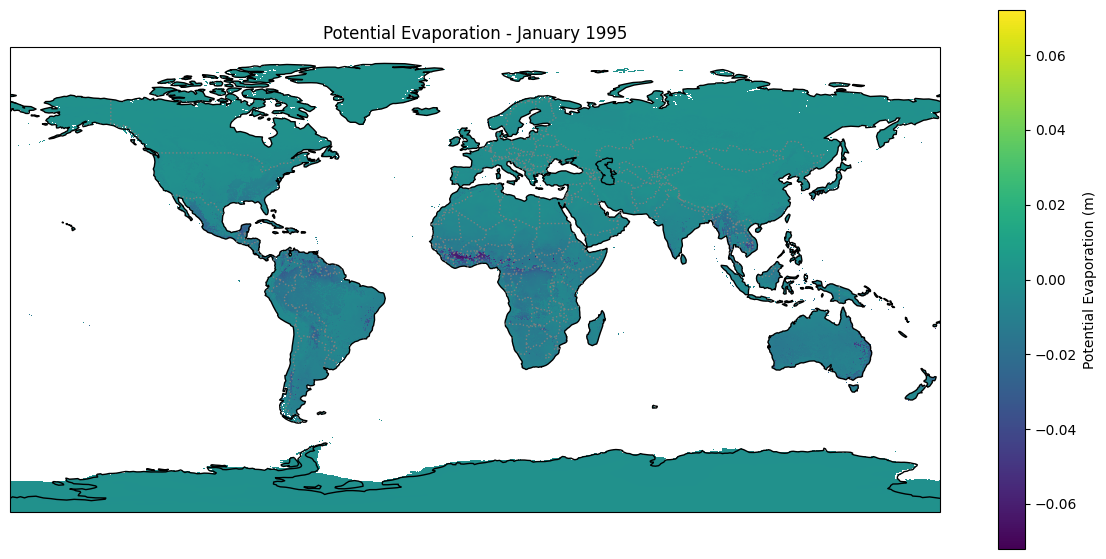

In [1]:
# Cell 1: Visualize All Downloaded Climate Variables for Jan 1995
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Configuration ---
file_path = r'../data/climate_monthly/era5_land_monthly_1995_multi-variable.grib'

# Define the variables we want to see, their GRIB short names, and their units
variables_to_plot = {
    '2t': {'name': '2m Temperature', 'units': '°C'},
    'tp': {'name': 'Total Precipitation', 'units': 'mm'},
    'swvl1': {'name': 'Volumetric Soil Water (Layer 1)', 'units': 'm³/m³'},
    'ssr': {'name': 'Surface Net Solar Radiation', 'units': 'J/m²'},
    'pev': {'name': 'Potential Evaporation', 'units': 'm'}
}

print("--- Generating a map for each climate variable for January 1995 ---")

# --- Loop Through Each Variable and Create a Map ---
for short_name, info in variables_to_plot.items():
    print(f"\nProcessing: {info['name']}")
    
    try:
        # --- Load ONE variable using the correct, working method ---
        ds = xr.open_dataset(
            file_path,
            engine="cfgrib",
            backend_kwargs={"indexpath": "", "filter_by_keys": {"shortName": short_name}},
        )
        
        # Extract the data array for the variable (the name might be different from the shortName)
        # We find the variable name by looking at what's in the dataset
        var_name = list(ds.data_vars)[0]
        data_array = ds[var_name]

        # Select the data for January 1995
        data_jan_1995 = data_array.sel(time="1995-01-01")

        # --- Unit Conversions ---
        if short_name == '2t': # Temperature
            data_jan_1995 = data_jan_1995 - 273.15
        if short_name == 'tp': # Precipitation
            data_jan_1995 = data_jan_1995 * 1000 # Convert m to mm

        # --- Plotting ---
        plt.figure(figsize=(15, 7))
        ax = plt.axes(projection=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
        
        # Use a suitable colormap for each variable
        cmap = 'coolwarm' if short_name == '2t' else 'viridis'

        data_jan_1995.plot(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            cbar_kwargs={'label': f"{info['name']} ({info['units']})"}
        )
        
        plt.title(f"{info['name']} - January 1995")
        plt.show()

    except Exception as e:
        print(f"  -> FAILED to process and plot '{info['name']}'. Error: {e}")